# Downloading COVID19 data from online



Material borrowed in part from
https://nbviewer.ipython.org/github/BodenmillerGroup/IntroDataAnalysis/blob/master/python/03_pandas_images.ipynb


Credit for the dataset: https://www.thelancet.com/journals/laninf/article/PIIS1473-3099(20)30120-1/fulltext

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

### Download data

Downloading data can sometimes be very seamless, using a URL directly with pandas.

In [2]:
# 2019-nCoV Data Repository by Johns Hopkins CSSE
confirmed_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
recovered_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
deaths_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

def fetch_covid(url, value_name):
    df = pd.read_csv(url).fillna('')  # groupby drops np.nan keys!
    groups = df.groupby(['Country/Region', 'Province/State', 'Lat', 'Long'])
    def melt_group_dates(group):
        group = group.drop(columns=groups.keys)
        group = group.melt(var_name='Date', value_name=value_name)
        group['Date'] = pd.to_datetime(group['Date'])
        return group.set_index('Date')
    return groups.apply(melt_group_dates).reset_index()

covid_cases = fetch_covid(confirmed_url, 'Confirmed')
covid_cases = pd.merge(covid_cases, fetch_covid(recovered_url, 'Recovered'))
covid_cases = pd.merge(covid_cases, fetch_covid(deaths_url, 'Deaths'))

FileNotFoundError: [Errno 2] No such file or directory: '../Data/covid19.csv'

In [6]:
# save it so you won't have to reprocess later
covid_cases.to_csv('data/covid19.csv', index=False)

In [7]:
covid_cases.shape

(63140, 8)

In [16]:
df = pd.read_csv('data/covid19.csv')

In [17]:
df.head()

,Country/Region,Province/State,Lat,Long,Date,Confirmed,Recovered,Deaths
0,NaN,NaN,NaN,NaN,2020-01-22,0.0,0.0,0.0
1,NaN,NaN,NaN,NaN,2020-01-23,0.0,0.0,0.0
2,NaN,NaN,NaN,NaN,2020-01-24,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,2020-01-25,0.0,0.0,0.0
4,NaN,NaN,NaN,NaN,2020-01-26,0.0,0.0,0.0


#### Exercise. Drop the rows which has Country/Region as NaN

In [18]:
# obtain the indexes which has NaN country/region
idxs = df.loc[df['Country/Region'].isna(), :].index
idxs

df.drop(index=idxs, inplace=True)

In [19]:
assert np.all(df['Country/Region'].isna() == False)

In [20]:
df['Country/Region'].unique().shape

(162,)

In [21]:
df.sort_values( # not in-place --> covid_cases remains unchanged
    ['Country/Region', 'Province/State', 'Date'],
    ascending=[True, True, False]
)

,Country/Region,Province/State,Lat,Long,Date,Confirmed,Recovered,Deaths
573,Afghanistan,NaN,33.939110,67.709953,2020-11-03,41728.0,34355.0,1544.0
572,Afghanistan,NaN,33.939110,67.709953,2020-11-02,41633.0,34342.0,1541.0
571,Afghanistan,NaN,33.939110,67.709953,2020-11-01,41501.0,34326.0,1536.0
570,Afghanistan,NaN,33.939110,67.709953,2020-10-31,41425.0,34321.0,1536.0
569,Afghanistan,NaN,33.939110,67.709953,2020-10-30,41334.0,34258.0,1533.0
...,...,...,...,...,...,...,...,...
62857,Zimbabwe,NaN,-19.015438,29.154857,2020-01-26,0.0,0.0,0.0
62856,Zimbabwe,NaN,-19.015438,29.154857,2020-01-25,0.0,0.0,0.0
62855,Zimbabwe,NaN,-19.015438,29.154857,2020-01-24,0.0,0.0,0.0
62854,Zimbabwe,NaN,-19.015438,29.154857,2020-01-23,0.0,0.0,0.0


In [22]:
df.dtypes

Country/Region     object
Province/State     object
Lat               float64
Long              float64
Date               object
Confirmed         float64
Recovered         float64
Deaths            float64
dtype: object

In [24]:
df['Date'] = pd.to_datetime(df['Date'])

In [25]:
df.dtypes

Country/Region            object
Province/State            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                float64
Recovered                float64
Deaths                   float64
dtype: object

In [26]:
for country_region, g in df.groupby('Country/Region'):
    max_date = g['Date'].max()
    confirmed = g.loc[g['Date'] == max_date, 'Confirmed'].sum()
    recovered = g.loc[g['Date'] == max_date, 'Recovered'].sum()
    deaths = g.loc[g['Date'] == max_date, 'Deaths'].sum()
    print(confirmed, recovered, deaths, country_region, sep='\t')

41728.0	34355.0	1544.0	Afghanistan
21904.0	11473.0	532.0	Albania
58979.0	40577.0	1980.0	Algeria
4910.0	3627.0	75.0	Andorra
11577.0	5230.0	291.0	Angola
128.0	117.0	3.0	Antigua and Barbuda
1195276.0	1009278.0	32052.0	Argentina
94776.0	57599.0	1413.0	Armenia
27622.0	25407.0	907.0	Australia
118198.0	74292.0	1192.0	Austria
58282.0	45030.0	768.0	Azerbaijan
6790.0	4632.0	149.0	Bahamas
82363.0	79680.0	324.0	Bahrain
412647.0	329787.0	5983.0	Bangladesh
238.0	222.0	7.0	Barbados
101329.0	87985.0	992.0	Belarus
452541.0	26661.0	12126.0	Belgium
3790.0	2262.0	61.0	Belize
2683.0	2455.0	41.0	Benin
358.0	327.0	0.0	Bhutan
141936.0	112526.0	8751.0	Bolivia
53822.0	29156.0	1317.0	Bosnia and Herzegovina
6642.0	4676.0	24.0	Botswana
5566049.0	5060697.0	160496.0	Brazil
148.0	143.0	3.0	Brunei
60537.0	21544.0	1412.0	Bulgaria
2530.0	2298.0	67.0	Burkina Faso
55804.0	39063.0	1307.0	Burma
597.0	511.0	1.0	Burundi
8944.0	8155.0	95.0	Cabo Verde
292.0	283.0	0.0	Cambodia
4866.0	1924.0	62.0	Central African Republic
1513.0	1

 Now we will only look at new cases:

In [27]:
confirmed = df.drop(columns=['Recovered', 'Deaths'])

In [28]:
confirmed.dtypes

Country/Region            object
Province/State            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                float64
dtype: object

In [29]:
confirmed

,Country/Region,Province/State,Lat,Long,Date,Confirmed
287,Afghanistan,NaN,33.939110,67.709953,2020-01-22,0.0
288,Afghanistan,NaN,33.939110,67.709953,2020-01-23,0.0
289,Afghanistan,NaN,33.939110,67.709953,2020-01-24,0.0
290,Afghanistan,NaN,33.939110,67.709953,2020-01-25,0.0
291,Afghanistan,NaN,33.939110,67.709953,2020-01-26,0.0
...,...,...,...,...,...,...
63135,Zimbabwe,NaN,-19.015438,29.154857,2020-10-30,8362.0
63136,Zimbabwe,NaN,-19.015438,29.154857,2020-10-31,8367.0
63137,Zimbabwe,NaN,-19.015438,29.154857,2020-11-01,8374.0
63138,Zimbabwe,NaN,-19.015438,29.154857,2020-11-02,8389.0


In [30]:
grouped = confirmed.groupby('Country/Region')

#### Make new cumulative which is the cumulative sum of the new cases

In [97]:
df.cumsum()

AttributeError: module 'pandas' has no attribute 'cumsum'

In [102]:
confirmed.loc[grouped.groups['Norway']].Confirmed.cumsum()

46494          0.0
46495          0.0
46496          0.0
46497          0.0
46498          0.0
           ...    
46776    2221408.0
46777    2241739.0
46778    2262374.0
46779    2283713.0
46780    2305669.0
Name: Confirmed, Length: 287, dtype: float64

In [103]:
for cty in grouped.groups.keys():
    cumsum = confirmed.loc[grouped.groups[cty]].Confirmed.cumsum()
    print(cumsum)
    break

287          0.0
288          0.0
289          0.0
290          0.0
291          0.0
         ...    
569    5613843.0
570    5655268.0
571    5696769.0
572    5738402.0
573    5780130.0
Name: Confirmed, Length: 287, dtype: float64


In [ ]:
confirmed.assign('Cumulative' = )

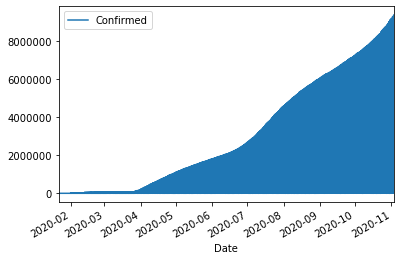

In [81]:
confirmed[['Date','Confirmed']].plot(x='Date',y='Confirmed')

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [3]:

case_thres = 1000
case_type = 'Confirmed'

def plot_covid_map(df, case_type, case_thres=1000):
    m = Basemap(projection='cyl')
    m.fillcontinents(color='peru')
    groupby_columns = ['Country/Region', 'Province/State', 'Lat', 'Long']
    
    for k, g in df.fillna('').groupby(groupby_columns):
        country_region, province_state, lat, long = k
        num_cases = g.loc[g['Date'] == g['Date'].max(), case_type].sum()
        if num_cases > case_thres:
            x, y = m(long, lat)
            p = m.plot(x, y, 'o', color='darkblue')
            plt.text(x, y, province_state or country_region)
        
plt.figure(figsize=(16, 12))
plot_covid_map(confirmed, case_type, case_thres)
plt.title(f'Provinces/states with more than {case_thres} {case_type.lower()}')
plt.show()



NameError: name 'confirmed' is not defined

<Figure size 1152x864 with 0 Axes>

#### Exercise. Copy and modify the above piece of code such that the size of the dot is proportional to the total number of cases in that country/region.

In [163]:
def my_plot(df, case_type, case_thres=50000):
    m = Basemap(projection='cyl')
    m.fillcontinents(color='peru', alpha=0.3)
    groupby_columns = ['Country/Region', 'Province/State', 'Lat', 'Long']
    
    for k, g in df.fillna('').groupby(groupby_columns):
        country_region, province_state, lat, long = k
        num_cases = g.loc[g['Date'] == g['Date'].max(), case_type].sum()
        if num_cases > case_thres:
            x, y = m(long, lat)
            
            opacity = np.log(num_cases) / np.log(max_num_cases)
            size = num_cases / max_num_cases
                        
            #print(country_region, opacity)
            
            #p = m.plot(x, y, marker='o',color='darkblue', alpha=opacity*4)
            
            p = m.scatter(long, lat, marker='o',color='darkblue', s=size*500, alpha=opacity)
            
            if num_cases > 1000000:
                plt.text(x, y, province_state or country_region)



In [164]:
-np.log(1)

-0.0

In [165]:
max_num_cases = confirmed.Confirmed.max()
max_num_cases

9382617.0

In [166]:
#cnt_sz = 

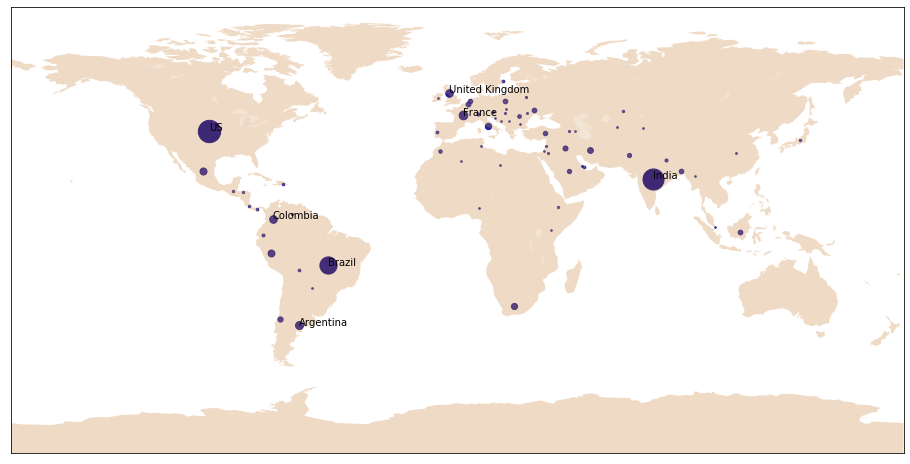

In [167]:
plt.figure(figsize=(16, 12))

my_plot(confirmed, 'Confirmed')

In [1]:


# Set the dimension of the figure
#my_dpi=96
#plt.figure(figsize=(2600/my_dpi, 1800/my_dpi), dpi=my_dpi)
# 
## read the data (on the web)
#data = pd.read_csv('http://python-graph-gallery.com/wp-content/uploads/TweetSurfData.csv', sep=";")
# 
## Make the background map
#m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
#m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
#m.fillcontinents(color='grey', alpha=0.3)
#m.drawcoastlines(linewidth=0.1, color="white")
# 
## prepare a color for each point depending on the continent.
#data['labels_enc'] = pd.factorize(data['homecontinent'])[0]
# 
## Add a point per position
#m.scatter(data['homelon'], data['homelat'], s=data['n']/6, alpha=0.4, c=data['labels_enc'], cmap="Set1")
# 
## copyright and source data info
#plt.text( -170, -58,'Where people talk about #Surf\n\nData collected on twitter by @R_Graph_Gallery during 300 days\nPlot realized with Python and the Basemap library', ha='left', va='bottom', size=9, color='#555555' )
# 
## Save as png
#plt.savefig('#315_Tweet_Surf_Bubble_map1.png', bbox_inches='tight')